In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# helper 
# phonemize all sentences 
from phonemizer.backend import EspeakBackend
from phonemizer.backend.espeak.wrapper import EspeakWrapper
from phonemizer.separator import Separator

EspeakWrapper.set_library(
    "/opt/homebrew/Cellar/espeak/1.48.04_1/lib/libespeak.1.1.48.dylib"
)

# initialize the espeak backend for English
backend = EspeakBackend("fr-fr")
separator = Separator(phone=" ", word=None)

def get_phonemes(text): 
    value = backend.phonemize([text], separator=separator, strip=True)

    phonemes = value[0].split(" ")
    
    return phonemes


In [117]:
# get pos tags for each word
import spacy 
from spacy_syllables import SpacySyllables  # noqa

model = "fr_core_news_lg"
if not spacy.util.is_package(model):
    import spacy.cli

    spacy.cli.download(model)  # type: ignore
nlp = spacy.load(model)
nlp.add_pipe("syllables", after="tok2vec")

In [118]:
content_function_word = {  # 1 content, 0 function, 2 others
    "ADJ": "content",
    "ADP": "function",
    "ADV": "content",
    "AUX": "function",
    "DET": "function",
    "NOUN": "content",
    "NUM": "function",
    "PRON": "function",
    "PROPN": "function",
    "VERB": "content",
    "INTJ": "function",
    "SCONJ": "function", 
    "CCONJ": "function", 
}


# sentence stats

In [96]:
sentences = pd.read_csv('../text/selected_with_translation.csv')
sentences.head()

,theme,type,structure,numer,tense,polarity,sentence,num_words,translation,translanted_num_words
0,science,declarative,simple,singular,present,affirmative,Energy flows from one system to another consta...,8,L'énergie circule constamment d'un système à l...,7
1,work,declarative,simple,plural,present,affirmative,Graduates celebrate their achievements with fa...,8,Les diplômés célèbrent leurs réalisations avec...,11
2,nature,declarative,simple,singular,present,affirmative,A frog jumps gracefully into the pond\n,7,Une grenouille saute gracieusement dans l'étang\n,6
3,basic,declarative,simple,plural,present,affirmative,Players cheer for their favorite teams\n,6,Les joueurs encouragent leurs équipes préférées\n,6
4,science,declarative,simple,plural,present,affirmative,Programmers write code to build interactive so...,8,Les programmeurs écrivent du code pour créer d...,11


In [97]:
sentences.iloc[0][['sentence', 'translation']]

sentence       Energy flows from one system to another consta...
translation    L'énergie circule constamment d'un système à l...
Name: 0, dtype: object

array([<Axes: title={'center': 'declarative'}, ylabel='Frequency'>],
      dtype=object)

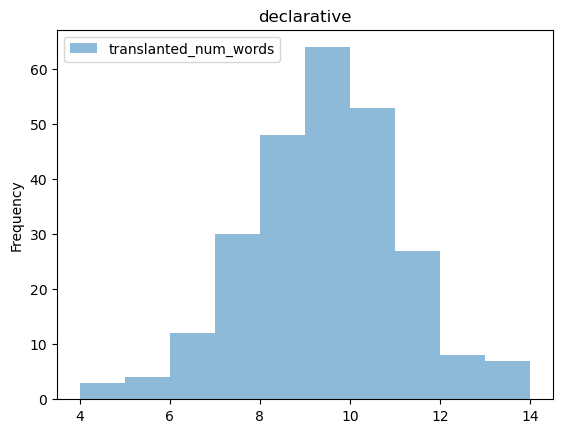

In [98]:
sentences[['type', 'translanted_num_words']].plot.hist(by='type', bins=10, alpha=0.5)

In [99]:
len(sentences.query("translanted_num_words < 10"))

161

In [100]:
subset = sentences.query("translanted_num_words < 10")

array([<Axes: title={'center': 'declarative'}, ylabel='Frequency'>],
      dtype=object)

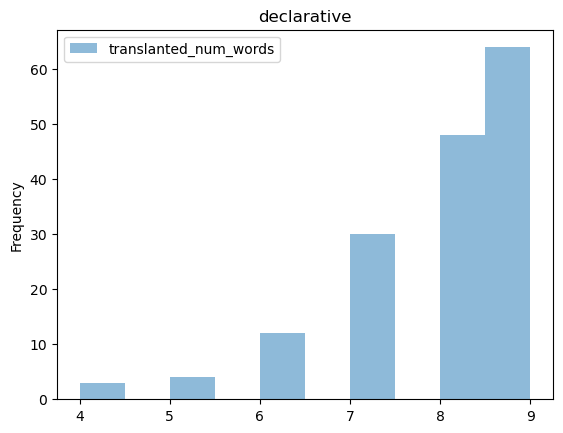

In [101]:
subset[['type', 'translanted_num_words']].plot.hist(by='type', bins=10, alpha=0.5)

In [122]:
pos_tags = []
word_id = []

def get_pos_tags(text): 
    doc = nlp(text)
    tags = [token.pos_ for token in doc if token.pos_ != "SPACE"]
    return tags, np.arange(len(tags))

for index, row in subset.iterrows():
    tags, id = get_pos_tags(row['translation'])
    pos_tags.append(tags)
    word_id.append(id)

pos_tags_df = pd.DataFrame({'id': np.concatenate(word_id), 'pos_tags': np.concatenate(pos_tags)})

pos_tags_df.head()

,id,pos_tags
0,0,DET
1,1,NOUN
2,2,VERB
3,3,ADV
4,4,ADP


Text(0.5, 1.0, 'pos percentage by word id')

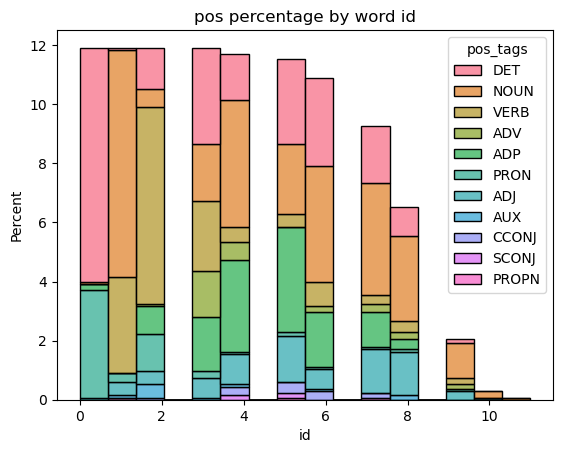

In [126]:
sns.histplot(pos_tags_df, x='id', hue='pos_tags', stat="percent", multiple='stack')
plt.title("pos percentage by word id")

Text(0.5, 1.0, 'content vs function percentage by word id')

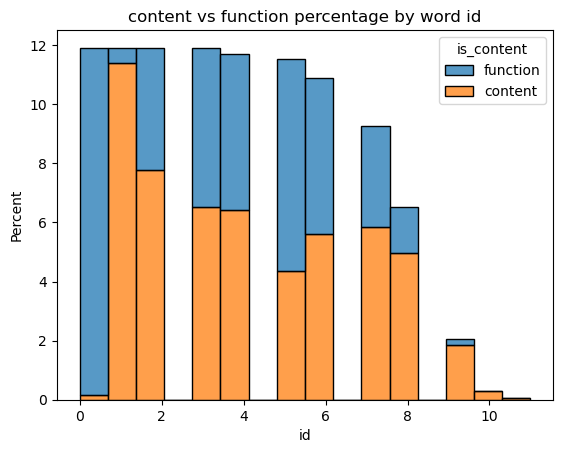

In [127]:
pos_tags_df['is_content'] = pos_tags_df['pos_tags'].apply(lambda x: content_function_word[x])

sns.histplot(pos_tags_df, x='id', hue='is_content', stat="percent", multiple='stack')
plt.title("content vs function percentage by word id")

# vocab

In [7]:
vocab = list(set(subset['translation'].str.cat(sep=' ').split()))

# clean the words 
for i in range(len(vocab)):
    vocab[i] = vocab[i].lower()
    # index of ' in word
    if ("'" in vocab[i]):
        if (vocab[i].index("'") == 1):
            vocab[i] = vocab[i][2:]
    elif "'\u200b'" in vocab[i]:
        vocab[i] = vocab[i].replace("'\u200b'", "")
vocab = list(set(vocab))
vocab.sort()
vocab

['a',
 'abritent',
 'accablants',
 'accepte',
 'accueil',
 'accueillantes',
 'accueille',
 'achète',
 'admire',
 'adore',
 'adorent',
 'affaires',
 'affrontent',
 'aidant',
 'aide',
 'aident',
 'aime',
 'aiment',
 'air',
 'ajoutent',
 'aliments',
 'allumer',
 'allées',
 'ami',
 'amicales',
 'amie',
 'amis',
 'amour',
 'amusantes',
 'améliorer',
 'animales',
 'anxieux',
 'anxiété',
 'apparaît',
 'appareils',
 'apprends',
 'approche',
 'apprécie',
 'apprécient',
 'apprécions',
 'après',
 'après-midi',
 'arbitres',
 'arbre',
 'arbres',
 'arc-en-ciel',
 'arrive',
 'arrêt',
 'art',
 'artisanal',
 'artistes',
 'assez',
 'athlète',
 'athlètes',
 'atmosphère',
 'attirent',
 'au',
 "aujourd'hui",
 'authentiques',
 'autre',
 'autres',
 'aux',
 'avant',
 'avec',
 'baies',
 'basket',
 'beaucoup',
 'bien',
 'bien-être',
 'bienfaits',
 'blagues',
 'bleue',
 'bois',
 'boissons',
 'bon',
 'bonheur',
 'bonne',
 'bonnes',
 'bougies',
 'boutique',
 'brille',
 'brise',
 'bruisser',
 'bus',
 'bénéficient',

In [8]:
print(f"num of unique words: {len(vocab)}")

num of unique words: 636


Text(0.5, 1.0, 'Character frequency all sentences')

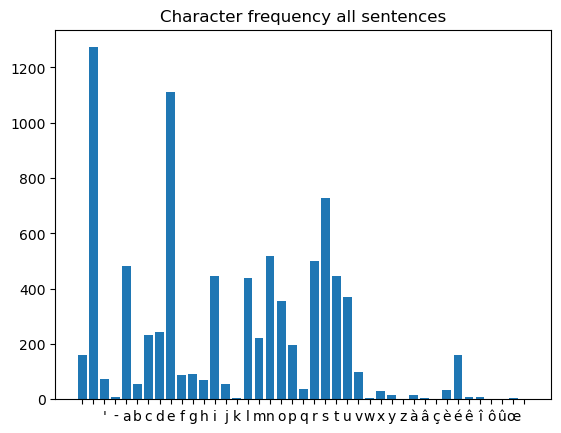

In [9]:
# get all char in sentence 
char = list("".join(subset.translation.str.cat(sep=' ')).lower())
unique_char, counts = np.unique(char, return_counts=True)

plt.bar(np.arange(len(unique_char)), counts, tick_label=unique_char)
plt.title('Character frequency all sentences')

# choose a subset of words 

In [22]:
len(set(vocab))

636

In [54]:
# words that are 4 char minimum, content words, check POS distribution, phonetic distribution, 50 words in total, 
vocab_filtered = [w for w in vocab if len(w) >=4]

Text(0.5, 1.0, 'POS distribution of words')

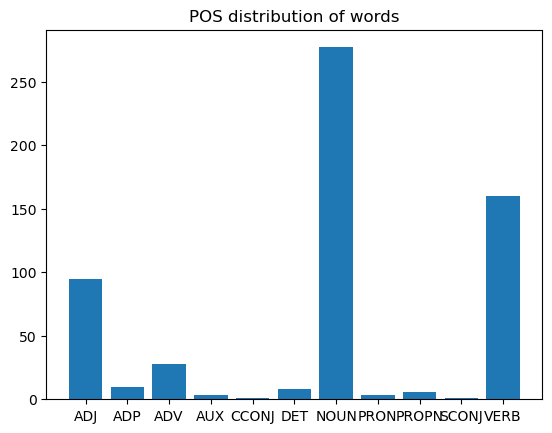

In [55]:
def get_pos(word): 
    doc = nlp(word)
    return doc[0].pos_

pos = [get_pos(w) for w in vocab_filtered]
np.unique(pos, return_counts=True)

plt.bar(np.unique(pos), np.unique(pos, return_counts=True)[1])
plt.title('POS distribution of words')

['content' 'function'] [560  32]


Text(0.5, 1.0, 'content vs functino word distribution')

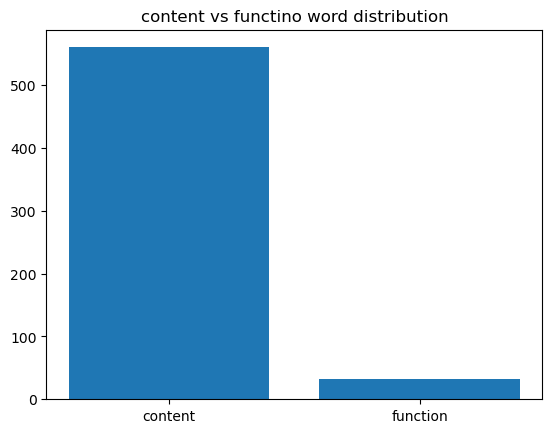

In [56]:

is_content = [content_function_word[p] for p in pos]

unique_c, counts = np.unique(is_content, return_counts=True)
print(unique_c, counts)

plt.bar(unique_c, counts)
plt.title("content vs functino word distribution")


In [57]:
# put words in df 
words = pd.DataFrame({'word': vocab_filtered, 'pos': pos, 'is_content': is_content})

# enrich 
words['phonemes'] = words['word'].apply(get_phonemes)
words['first_phone'] = words['phonemes'].apply(lambda x: x[0])
words.head()

,word,pos,is_content,phonemes,first_phone
0,abritent,VERB,content,"[a, b, ʁ, i, t]",a
1,accablants,NOUN,content,"[a, k, a, b, l, ɑ̃]",a
2,accepte,VERB,content,"[a, k, s, ɛ, p, t]",a
3,accueil,NOUN,content,"[a, k, œ, j]",a
4,accueillantes,VERB,content,"[a, k, œ, j, ɑ̃, t]",a


Text(0.5, 1.0, 'First phone distribution of words (length >= 4)')

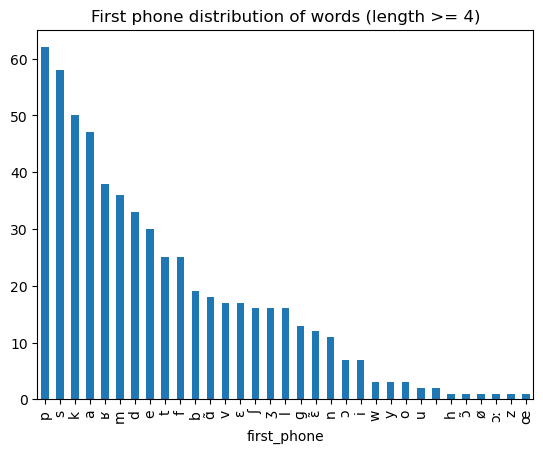

In [58]:
words.first_phone.value_counts().plot.bar()
plt.title('First phone distribution of words (length >= 4)')

In [61]:
infrequence_first_phones = words.first_phone.value_counts()[words.first_phone.value_counts() < 10].index

temp = words[~words.first_phone.isin(infrequence_first_phones)]
len(temp)

559

In [62]:
# remove words with symbols 
temp = temp[~temp.word.str.contains(r'[^\w\s]')]
temp = temp[~temp.word.str.contains(r'[\u200b]')]
len(temp)

550

In [84]:
sample_n = 20

final_words = temp.sample(sample_n)

# analysis of words selected for single word trials 

In [85]:
len(final_words)

20

Text(0.5, 1.0, 'phoneme frenquency in words')

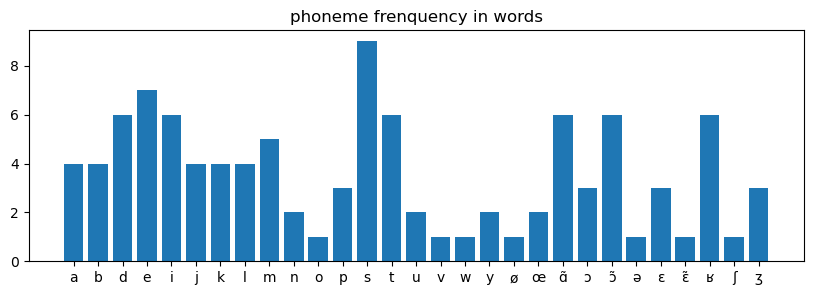

In [86]:
unique_phonemes, counts = np.unique(np.hstack(final_words.phonemes.values), return_counts=True)

plt.figure(figsize=(10, 3))
plt.bar(np.arange(len(unique_phonemes)), counts, tick_label=unique_phonemes)
plt.title("phoneme frenquency in words")

Text(0.5, 1.0, 'distribution of n syllable in words')

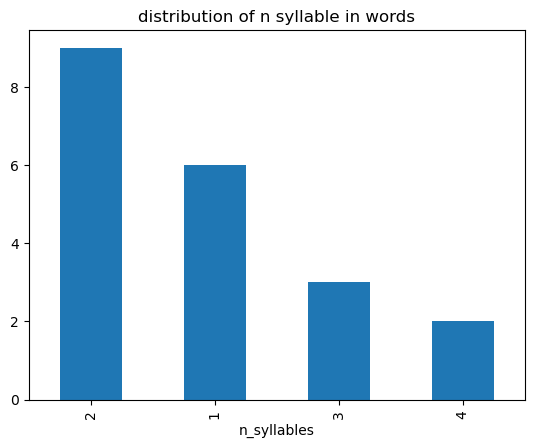

In [87]:
def n_syllables(words): 
    doc = nlp(words)
    return doc[0]._.syllables_count

final_words['n_syllables'] = final_words['word'].apply(n_syllables)

final_words.n_syllables.value_counts().plot.bar()
plt.title('distribution of n syllable in words')

Text(0.5, 1.0, 'distribution of n_char of words')

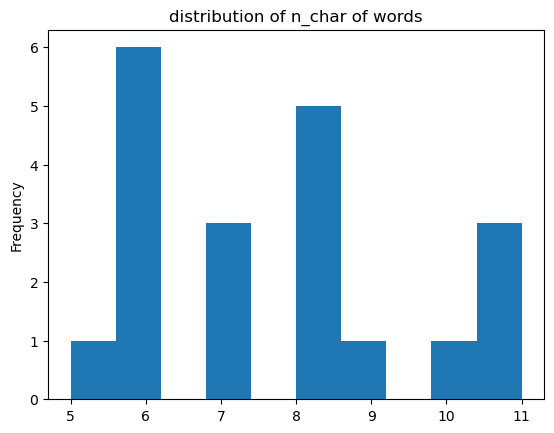

In [88]:
final_words.word.apply(len).plot.hist()
plt.title("distribution of n_char of words")

Text(0.5, 1.0, 'First phone distribution of final words')

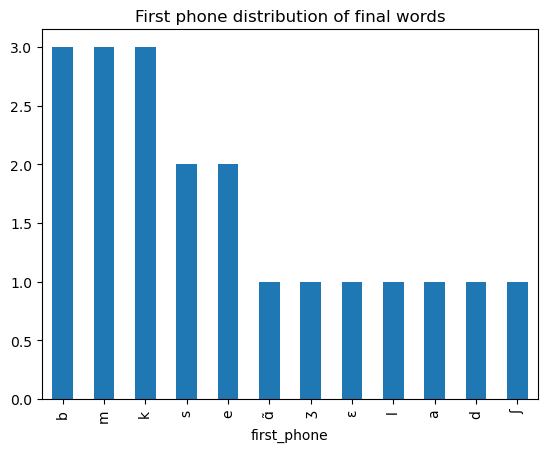

In [91]:
final_words.first_phone.value_counts().plot.bar()
plt.title('First phone distribution of final words')

Text(0.5, 1.0, 'POS distribution of final words')

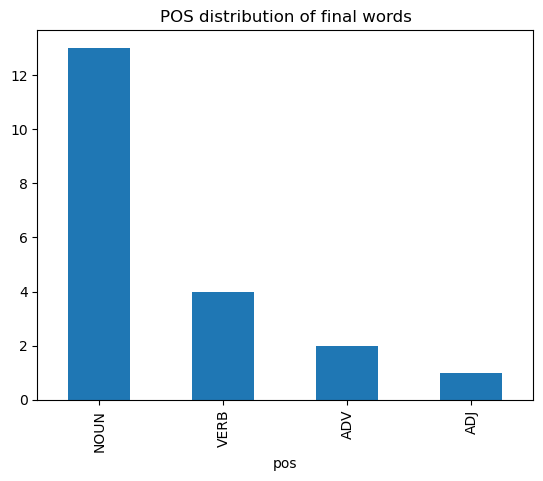

In [95]:
final_words.pos.value_counts().plot.bar()
plt.title('POS distribution of final words')

In [89]:
final_words.to_csv('../text/selected_words_final.csv', index=False)